In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=2022)

In [4]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_images,val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images,test_labels))
CLASS_NAMES= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

tf.Tensor(5, shape=(), dtype=uint8)
tf.Tensor(9, shape=(), dtype=uint8)
tf.Tensor(6, shape=(), dtype=uint8)
tf.Tensor(3, shape=(), dtype=uint8)
tf.Tensor(5, shape=(), dtype=uint8)
tf.Tensor(7, shape=(), dtype=uint8)
tf.Tensor(5, shape=(), dtype=uint8)
tf.Tensor(5, shape=(), dtype=uint8)
tf.Tensor(2, shape=(), dtype=uint8)
tf.Tensor(3, shape=(), dtype=uint8)
tf.Tensor(0, shape=(), dtype=uint8)
tf.Tensor(3, shape=(), dtype=uint8)
tf.Tensor(8, shape=(), dtype=uint8)
tf.Tensor(4, shape=(), dtype=uint8)
tf.Tensor(8, shape=(), dtype=uint8)
tf.Tensor(2, shape=(), dtype=uint8)
tf.Tensor(3, shape=(), dtype=uint8)
tf.Tensor(6, shape=(), dtype=uint8)
tf.Tensor(7, shape=(), dtype=uint8)
tf.Tensor(2, shape=(), dtype=uint8)


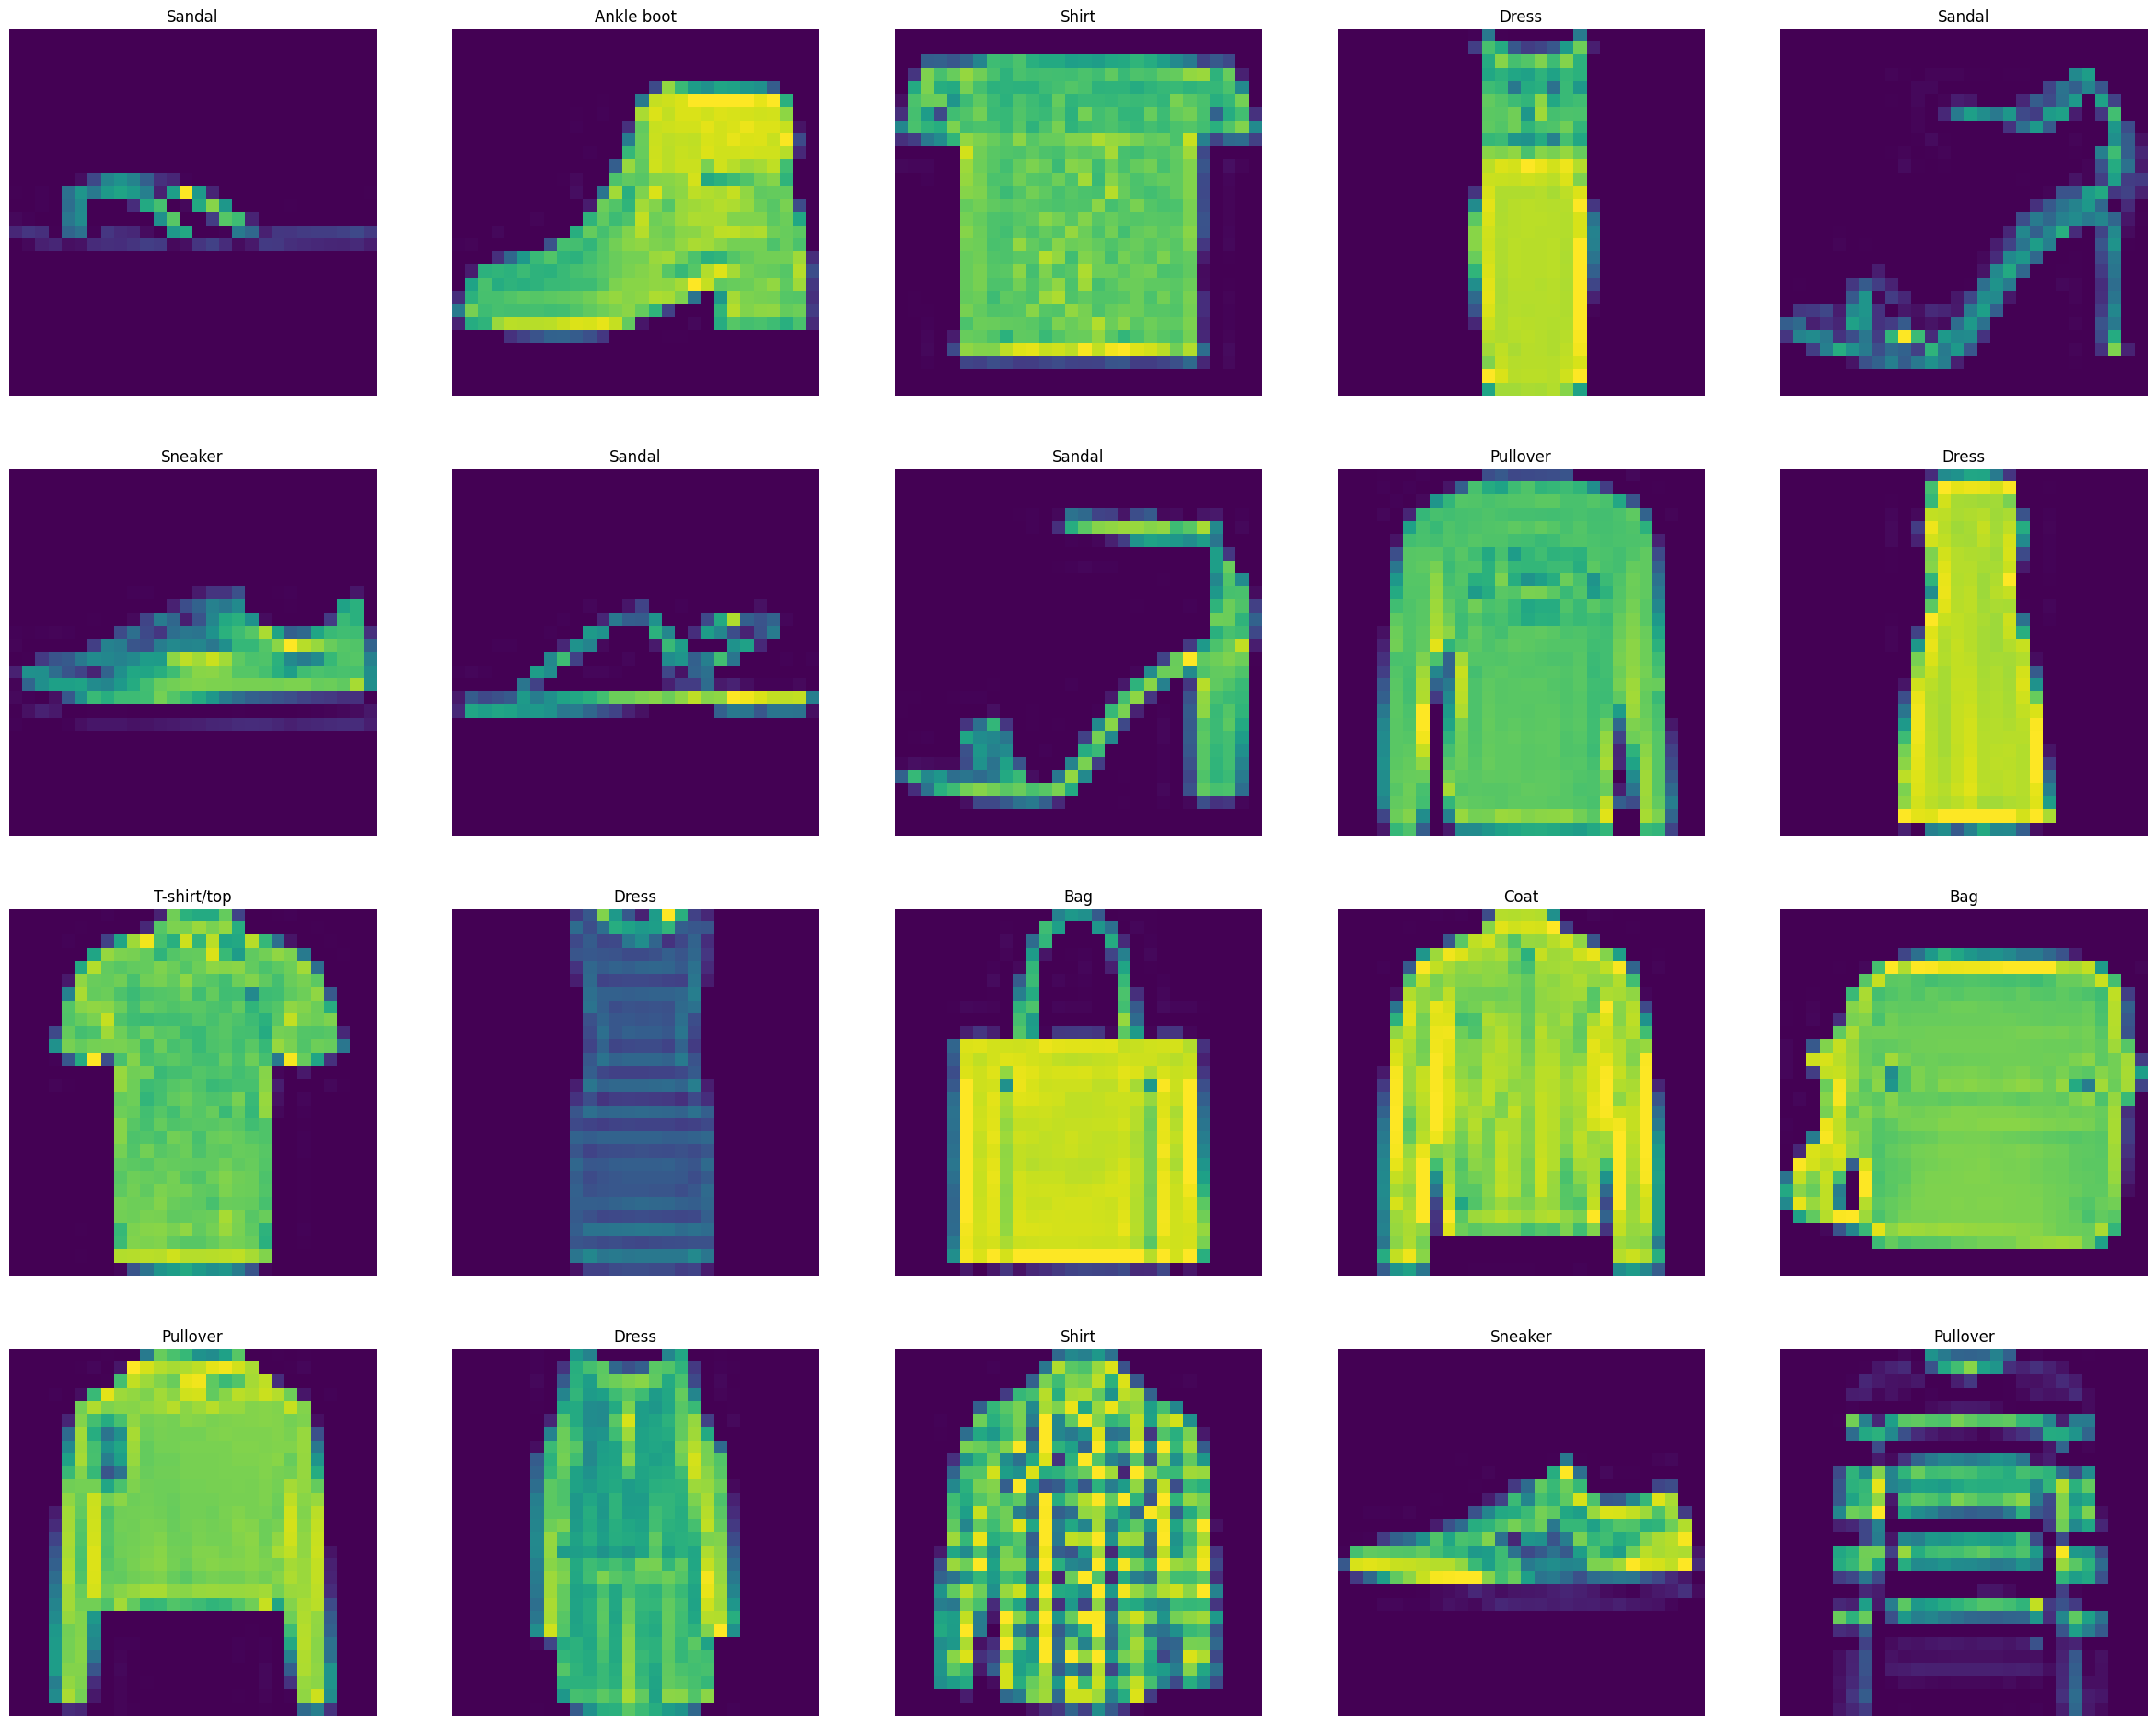

In [8]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label])
    plt.axis('off')

In [5]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
val_ds_size = tf.data.experimental.cardinality(val_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print('Train set size:',train_ds_size)
print('Validation set size:',val_ds_size)
print('Test set size:',test_ds_size)

Train set size: 48000
Validation set size: 12000
Test set size: 10000


In [6]:
def process_image(image, label):
  image = tf.reshape(image, [28,28,1])
  image = tf.image.grayscale_to_rgb(image)
  image = tf.image.per_image_standardization(image)
  image = tf.image.resize(image,[224,224]) #Alexnet needs images with high resolution

  return image, label

train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
val_ds=(val_ds
          .map(process_image)
          .shuffle(buffer_size=val_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
          )

In [11]:
model = Sequential(
    [
      Conv2D(filters=96, kernel_size=11, strides=4, input_shape=(224,224,3), padding="same", activation='relu'),
      MaxPooling2D(pool_size=3, strides=2),
      Conv2D(filters=256, kernel_size=5, padding="same", activation='relu'),
      MaxPooling2D(pool_size=3, strides=2),
      Conv2D(filters=384, kernel_size=3, padding="same", activation='relu'),
      Conv2D(filters=384, kernel_size=3, padding="same", activation='relu'),
      Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
      MaxPooling2D(pool_size=3, strides=2),
      Flatten(),
      Dense(units=4096, activation='relu'),
      Dropout(0.5),
      Dense(units=4096, activation='relu'),
      Dropout(0.5),
      Dense(units=10, activation='softmax')
    ]
)
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 256)       8

In [12]:
history=model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    validation_freq=1
)

Epoch 1/10


In [ ]:
cross_entropy = model.evaluate(test_ds)
print("Test loss and accuracy: ",cross_entropy)

In [ ]:
test_preds=model.predict(test_images)
print("First 10 test results:")
for i in range(10):
    index_max = max(range(len(test_preds[i])), key=test_preds[i].__getitem__)
    print("Prediction: {} Actual: {}".format(index_max,test_labels[i]))